In [2]:
# SARIMAX example
from statsmodels.tsa.statespace.sarimax import SARIMAX
from math import sin
from random import random
#import csv
import pandas as pd
import numpy as np

import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [3]:
def loadSourceData():
    df = pd.read_csv('GlobalLandTemperaturesByState.csv', sep=",") #change file to filepath
    output = df[(df.Country == 'United States')  & (df['dt'] > '2009-07-04') ]
    

    return (output)

In [71]:
output = loadSourceData().set_index(['dt']).drop(columns=['AverageTemperatureUncertainty', 'Country']).sort_index(axis = 0) 


state_list = output.State.unique()[:1]
print(state_list)

['Alabama']


In [74]:
output.head(2)

,AverageTemperature,State
dt,,
2009-08-01,26.150,Alabama
2009-08-01,17.469,Idaho


In [15]:
output.to_pickle('pickledDF')
output.to_csv('stateTemp.csv')

In [10]:
unpickled_df = pd.read_pickle("./pickledDF")
unpickled_df.head(2)

,AverageTemperature,State
dt,,
2009-08-01,26.150,Alabama
2009-09-01,24.416,Alabama


Alabama


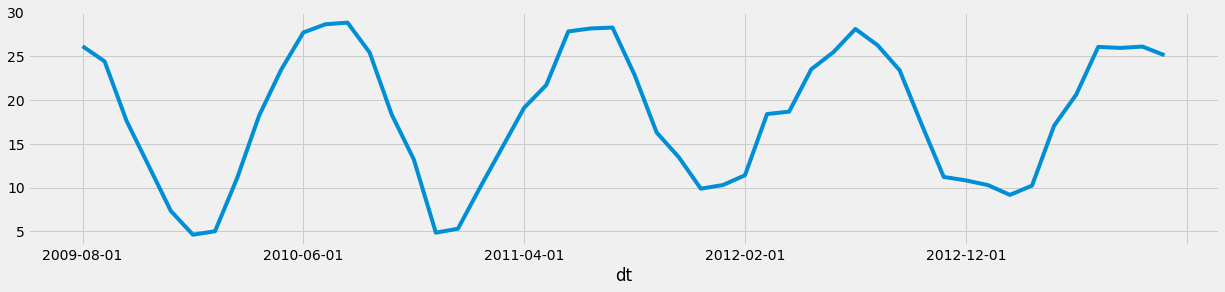

In [78]:
for st in state_list:
    print(st)
    data = output[(output.State == st)]['AverageTemperature']

    #print(data)
    # fit model
    model = SARIMAX(data, order=(1, 0, 0), seasonal_order=(2, 1, 0, 31))
    results = model.fit(disp=False)
    # make prediction
    #yhat = results.predict(len(data), len(data))
    #print(yhat)
    #print(results.aic)

    data.plot(figsize=(19, 4))
    plt.show()

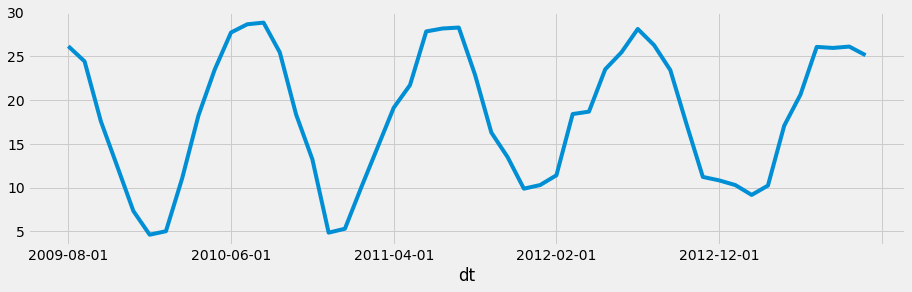

In [98]:
pred = results.get_prediction(start=pd.to_datetime('2010-06-01'), dynamic=False)

ax = data.plot(label='observed', figsize=(14, 4))

y_forecasted = pred.predicted_mean
y_truth = output['2010-06-01':]


In [99]:
y_forecasted = pred.predicted_mean
y_forecasted.head(12)

2010-06-01    0.014498
2010-07-01    0.017329
2010-08-01    0.019885
2010-09-01    0.022057
2010-10-01    0.023227
2010-11-01    0.022850
2010-12-01    0.021482
2011-01-01    0.018650
2011-02-01    0.016148
2011-03-01    0.014686
2011-04-01    0.014073
2011-05-01    0.014162
Freq: MS, dtype: float64

In [100]:
#y_truth.head()
data.head()

dt
2009-08-01    26.150
2009-09-01    24.416
2009-10-01    17.575
2009-11-01    12.464
2009-12-01     7.319
Name: AverageTemperature, dtype: float64

In [ ]:
output['forecast'] = model_fit.predict(start = 22000, end= 23000, dynamic= True)  
output[['AverageTemperature', 'forecast']].plot(figsize=(12, 8))